# 1 - Libraries

In [45]:
%load_ext autoreload
%autoreload 2

import sys
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', 100)

sys.path.append('./../')
import config
from utils import tools
from data_analysis import analysis_plotter, analysis_utils, reporter, dos_plotter
from data_handling import data_processing


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from tabulate import tabulate
from autogluon.tabular import TabularDataset, TabularPredictor
from imblearn.over_sampling import SMOTE, SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Data

In [46]:
MaterialsProcessor = data_processing.DataProcessor(config.PATH_TEST_FIGURES)
materials_data, supercon_data = MaterialsProcessor.processor()
materials_data.head()

2024-07-09 20:10:01: · MODULE: DataProcessor...
2024-07-09 20:10:25:   - 1 rows (0.0017 %) where dropped because of null on ICSD.


,bravais_lattice,material_name,ICSD,fermi_energy,is_magnetic,is_superconductor,DOS_m15_00,DOS_m14_98,DOS_m14_97,DOS_m14_95,DOS_m14_94,DOS_m14_92,DOS_m14_91,DOS_m14_89,DOS_m14_88,DOS_m14_86,DOS_m14_85,DOS_m14_83,DOS_m14_82,DOS_m14_80,DOS_m14_79,DOS_m14_77,DOS_m14_76,DOS_m14_74,DOS_m14_73,DOS_m14_71,DOS_m14_70,DOS_m14_68,DOS_m14_67,DOS_m14_65,DOS_m14_64,DOS_m14_62,DOS_m14_61,DOS_m14_59,DOS_m14_58,DOS_m14_56,DOS_m14_55,DOS_m14_53,DOS_m14_52,DOS_m14_50,DOS_m14_49,DOS_m14_47,DOS_m14_46,DOS_m14_44,DOS_m14_43,DOS_m14_41,DOS_m14_40,DOS_m14_38,DOS_m14_37,DOS_m14_35,...,DOS_p14_26,DOS_p14_28,DOS_p14_29,DOS_p14_31,DOS_p14_32,DOS_p14_34,DOS_p14_35,DOS_p14_37,DOS_p14_38,DOS_p14_40,DOS_p14_41,DOS_p14_43,DOS_p14_44,DOS_p14_46,DOS_p14_47,DOS_p14_49,DOS_p14_50,DOS_p14_52,DOS_p14_53,DOS_p14_55,DOS_p14_56,DOS_p14_58,DOS_p14_59,DOS_p14_61,DOS_p14_62,DOS_p14_64,DOS_p14_65,DOS_p14_67,DOS_p14_68,DOS_p14_70,DOS_p14_71,DOS_p14_73,DOS_p14_74,DOS_p14_76,DOS_p14_77,DOS_p14_79,DOS_p14_80,DOS_p14_82,DOS_p14_83,DOS_p14_85,DOS_p14_86,DOS_p14_88,DOS_p14_89,DOS_p14_91,DOS_p14_92,DOS_p14_94,DOS_p14_95,DOS_p14_97,DOS_p14_98,DOS_p15_00
0,BCC,Ag1F6Sb1,28676,-2.03066,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.71,15.320,14.66,14.52,14.680,15.010,15.450,15.770,16.220,14.680,13.820,13.440,13.140,13.290,13.820,14.310,14.470,15.000,15.540,15.180,16.240,13.530,13.850,18.400,16.410,18.680,19.230,21.060,25.880,21.200,13.110,13.120,14.810,19.930,22.250,22.500,21.720,18.370,19.370,20.540,25.41,23.860,19.850,27.770,29.790,28.08,26.42,24.860,27.730,23.260
1,BCC,Ag1F6Sb1,411795,-2.03253,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.15,14.230,14.65,14.96,15.490,15.970,14.960,14.440,13.690,13.310,13.190,13.570,14.080,14.390,14.530,14.930,14.810,14.930,14.330,13.680,15.120,16.920,13.810,16.850,18.520,20.030,22.430,19.040,13.300,14.590,17.560,21.130,23.230,24.140,20.310,17.120,22.790,22.930,25.940,22.210,19.21,31.850,27.130,23.780,24.300,23.84,24.25,23.330,21.920,13.800
2,BCC,Ag1Te3,37186,5.57824,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.69,3.694,3.74,3.80,3.878,3.943,4.103,4.258,4.408,4.756,4.865,4.809,4.747,4.569,4.548,4.474,4.372,4.284,4.206,4.131,4.055,3.944,3.864,3.755,3.716,3.505,3.405,3.399,3.527,3.658,3.725,3.717,3.724,3.709,3.708,3.723,3.728,3.792,3.885,4.044,4.28,4.382,4.718,4.755,4.829,4.87,4.86,4.833,4.785,4.651
3,BCC,Ag3Au1Se2,15734,2.21332,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000
4,BCC,Ag3Au1Se2,171959,2.22832,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000


In [47]:
supercon_data['ICSD'] = supercon_data['ICSD'].apply(lambda x: int(x.replace('ICSD_', '')))
supercon_data

,chemical_formula,critical_temperature_k,ICSD,synth_doped
0,Ag0.002Al0.998,1.128000,604645,True
1,Ag0.005Zn0.995,0.763000,107744,True
2,Ag0.02Ge2Pd1.98Sr1,2.640000,165985,True
3,Ag0.07Sn0.9Te1,1.730000,19128,True
4,Ag0.153Ba1.99Cu2.847Y1O6.7,86.000000,202498,True
...,...,...,...,...
86485,Zr1,0.996667,76154,False
86486,Zr1,0.996667,43700,False
86487,Zr1,0.996667,164572,False
86488,Zr1,0.996667,253515,False


# 3. Model

In [48]:
path_final = r'.\..\results\patrones' 
data = materials_data.copy()
data.dropna(inplace=True)
data['is_superconductor'] = data['is_superconductor'].astype(bool)

n_PCA = 10
pca_columns = [f'PC{i+1}' for i in range(n_PCA)]
dos_cols = data.loc[:, 'DOS_m15_00':'DOS_p15_00'].columns.tolist()
categorical_cols = ['bravais_lattice']
target_col = ['is_superconductor']
numerical_cols = ['fermi_energy', 'is_magnetic']

X = data.drop(target_col, axis=1)
X = X.fillna(0) 
y = data[target_col]
y = y.iloc[:, 0]

pca = PCA(n_components=n_PCA)
X_pca = pca.fit_transform(X[dos_cols])
X_pca = pd.DataFrame(X_pca, columns=pca_columns)

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = RobustScaler()
X_categorical = categorical_transformer.fit_transform(X[categorical_cols]).toarray()
X_categorical = pd.DataFrame(X_categorical, columns=categorical_transformer.get_feature_names_out(categorical_cols))
X_numerical = numerical_transformer.fit_transform(X[numerical_cols])
X_numerical = pd.DataFrame(X_numerical, columns=numerical_cols)

X = pd.concat([X_categorical, X_numerical, X_pca], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sampling_method = RandomOverSampler()
X_train_sampled, y_train_sampled = sampling_method.fit_resample(X_train, y_train)
X_train, X_eval, y_train, y_eval = train_test_split(X_train_sampled, y_train_sampled, test_size=0.2)


################ MODELO 

params = {
    'colsample_bytree': 0.5,
    'gamma': 0.01,
    'learning_rate': 0.22346832437911052,
    'max_depth': 24,
    'n_estimators': 1500,
    'reg_alpha': 0.01,
    'reg_lambda': 0.01,
    'subsample': 0.8240736137234501
}

model = XGBClassifier(**params)
model.fit(X_train, y_train, eval_set=[(X_eval, y_eval), (X_test, y_test)], eval_metric=['error'], early_stopping_rounds=50, verbose=False)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print(f"\nMétricas de rendimiento:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Matriz de confusión:\n{confusion_matrix_result}\n")

c:\Users\Usuario\anaconda3\envs\superconductor\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\Usuario\anaconda3\envs\superconductor\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Métricas de rendimiento:
Accuracy: 0.9399
Precision: 0.6306
Recall: 0.6485
F1-score: 0.6394
AUC: 0.9315
Matriz de confusión:
[[10678   376]
 [  348   642]]



In [49]:
len(X_test)

12044

In [50]:
X_test_predictions = data.iloc[X_test.index].copy()
X_test_predictions['predicted_superconductor'] = y_pred.astype(bool).copy()
X_test_predictions = pd.merge(X_test_predictions, supercon_data[['ICSD', 'critical_temperature_k', 'synth_doped']], on='ICSD', how='left')
X_test_predictions

,bravais_lattice,material_name,ICSD,fermi_energy,is_magnetic,is_superconductor,DOS_m15_00,DOS_m14_98,DOS_m14_97,DOS_m14_95,DOS_m14_94,DOS_m14_92,DOS_m14_91,DOS_m14_89,DOS_m14_88,DOS_m14_86,DOS_m14_85,DOS_m14_83,DOS_m14_82,DOS_m14_80,DOS_m14_79,DOS_m14_77,DOS_m14_76,DOS_m14_74,DOS_m14_73,DOS_m14_71,DOS_m14_70,DOS_m14_68,DOS_m14_67,DOS_m14_65,DOS_m14_64,DOS_m14_62,DOS_m14_61,DOS_m14_59,DOS_m14_58,DOS_m14_56,DOS_m14_55,DOS_m14_53,DOS_m14_52,DOS_m14_50,DOS_m14_49,DOS_m14_47,DOS_m14_46,DOS_m14_44,DOS_m14_43,DOS_m14_41,DOS_m14_40,DOS_m14_38,DOS_m14_37,DOS_m14_35,...,DOS_p14_31,DOS_p14_32,DOS_p14_34,DOS_p14_35,DOS_p14_37,DOS_p14_38,DOS_p14_40,DOS_p14_41,DOS_p14_43,DOS_p14_44,DOS_p14_46,DOS_p14_47,DOS_p14_49,DOS_p14_50,DOS_p14_52,DOS_p14_53,DOS_p14_55,DOS_p14_56,DOS_p14_58,DOS_p14_59,DOS_p14_61,DOS_p14_62,DOS_p14_64,DOS_p14_65,DOS_p14_67,DOS_p14_68,DOS_p14_70,DOS_p14_71,DOS_p14_73,DOS_p14_74,DOS_p14_76,DOS_p14_77,DOS_p14_79,DOS_p14_80,DOS_p14_82,DOS_p14_83,DOS_p14_85,DOS_p14_86,DOS_p14_88,DOS_p14_89,DOS_p14_91,DOS_p14_92,DOS_p14_94,DOS_p14_95,DOS_p14_97,DOS_p14_98,DOS_p15_00,predicted_superconductor,critical_temperature_k,synth_doped
0,HEX,Ca1Ni2Si1,412411,5.755890,False,False,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,...,4.9520,5.429,4.9340,4.6120,4.3040,4.048,3.9020,3.9340,3.9570,3.9690,4.0350,4.1200,4.2590,4.5760,4.6570,6.1050,4.7860,4.7560,4.8360,4.8310,4.8550,4.7950,4.7570,4.7330,4.719,4.721,4.7750,5.0160,4.5590,4.4160,4.4770,4.3380,4.2160,4.1700,4.117,4.3810,4.2670,4.1710,4.1590,4.1620,4.1740,4.1930,4.2420,4.4310,4.5170,4.4000,4.2910,False,NaN,NaN
1,MCLC,C2Ce1Co1,617336,8.499590,True,False,0.6183,0.6583,0.6989,0.8708,0.8285,1.2517,1.4233,1.6398,1.8514,2.018,2.264,2.343,2.596,2.809,3.319,3.588,4.059,4.743,5.029,5.439,5.838,6.176,6.878,7.957,8.724,9.893,10.603,11.938,11.449,10.877,10.3,11.206,10.804,10.446,8.354,7.574,8.199,7.695,6.566,5.245,4.41,4.068,3.686,3.363,...,3.5150,3.468,3.4540,3.4820,3.3610,3.308,3.3520,3.3630,3.4350,3.4230,3.3420,3.2390,3.2590,3.2770,3.2140,3.1190,3.0820,3.0300,2.9600,2.9630,2.9780,2.9530,2.8770,2.8320,2.867,2.916,2.9690,3.0920,3.2010,3.2110,3.1990,3.2630,3.3950,3.5490,3.615,3.7180,3.9820,4.2730,4.3110,4.3860,4.5050,4.7910,4.5960,4.4900,4.6250,4.6670,4.4390,False,NaN,NaN
2,ORC,S3Sr1Zr1,23287,2.767490,False,False,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,...,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,False,NaN,NaN
3,HEX,Al1O4P1,150689,0.457967,False,False,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,...,7.9810,8.055,8.1790,8.3570,8.6330,9.160,8.7070,7.8590,7.1340,6.5480,6.2670,6.0920,5.9170,5.7400,5.6340,5.9660,6.2970,5.9160,5.7450,5.7020,5.9000,6.3110,7.1710,8.4770,8.875,9.165,8.0130,7.5360,7.0520,6.6460,6.1640,6.3580,6.7520,7.7960,7.202,5.8460,5.8640,5.7820,5.7120,5.6000,5.5690,5.6520,6.1240,6.3480,6.7170,7.2790,7.9390,False,NaN,NaN
4,ORCI,Ag2O2Pd1,51499,1.986870,False,False,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0

In [51]:
X_test_predictions.columns

Index(['bravais_lattice', 'material_name', 'ICSD', 'fermi_energy',
       'is_magnetic', 'is_superconductor', 'DOS_m15_00', 'DOS_m14_98',
       'DOS_m14_97', 'DOS_m14_95',
       ...
       'DOS_p14_91', 'DOS_p14_92', 'DOS_p14_94', 'DOS_p14_95', 'DOS_p14_97',
       'DOS_p14_98', 'DOS_p15_00', 'predicted_superconductor',
       'critical_temperature_k', 'synth_doped'],
      dtype='object', length=2008)

Descripción estadística de los verdaderos positivos:
1943
                ICSD  fermi_energy  critical_temperature_k
count         1943.0   1943.000000             1943.000000
mean   270894.948533      5.881821               10.125187
std    226814.118606      2.238513               14.215944
min           1455.0     -3.502830                0.000000
25%          96705.0      3.881740                0.000000
50%         180479.0      5.786590                4.120000
75%         604447.0      7.282980               14.800000
max         659988.0     13.865400              132.900000

Descripción estadística de los falsos negativos:
1090
                ICSD  fermi_energy  critical_temperature_k
count         1090.0   1090.000000             1090.000000
mean   300169.027523      5.803922               11.011413
std    238541.300172      2.247694               17.747745
min           1024.0     -3.320910                0.000000
25%         105981.0      4.587565                0.003012
50

c:\Users\Usuario\anaconda3\envs\superconductor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\anaconda3\envs\superconductor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


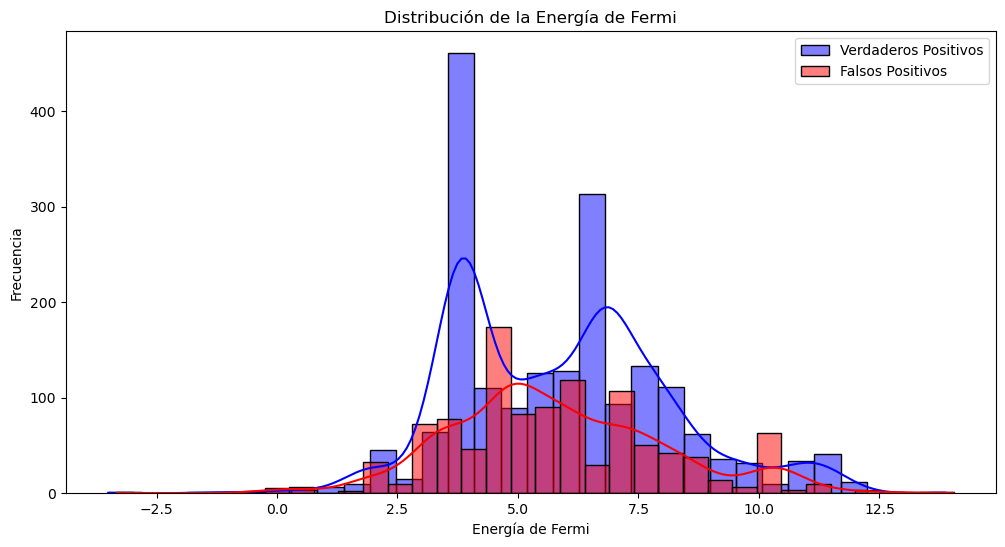

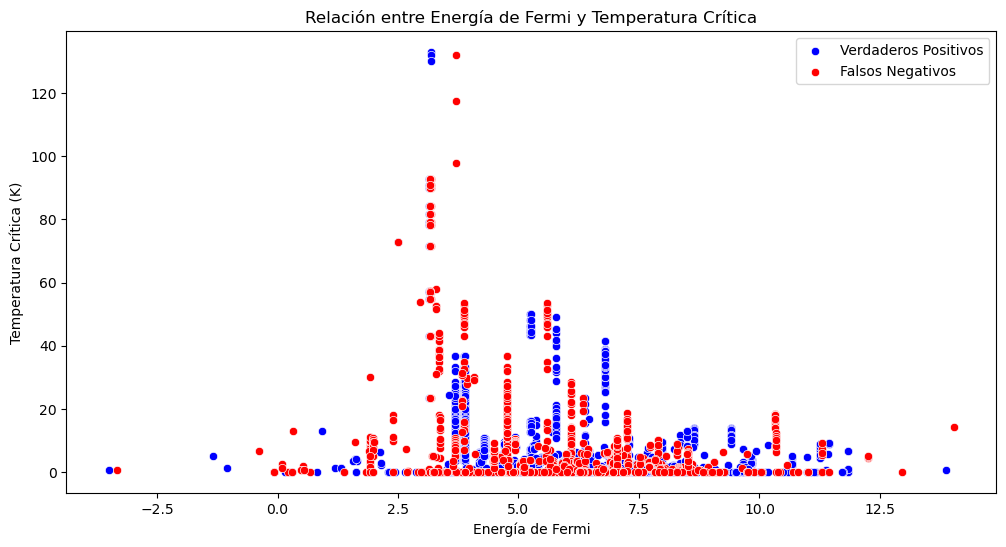

c:\Users\Usuario\anaconda3\envs\superconductor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\anaconda3\envs\superconductor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


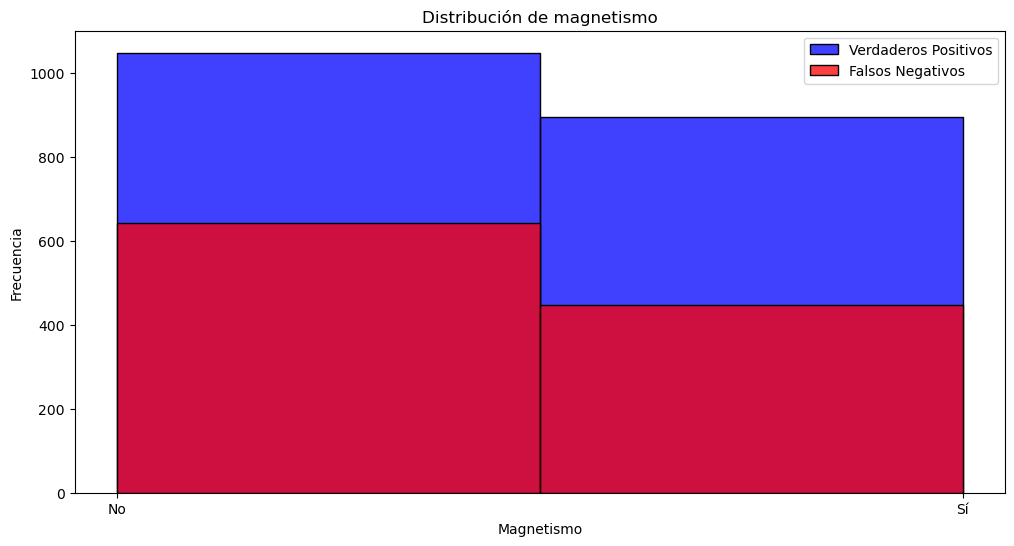

c:\Users\Usuario\anaconda3\envs\superconductor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\anaconda3\envs\superconductor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


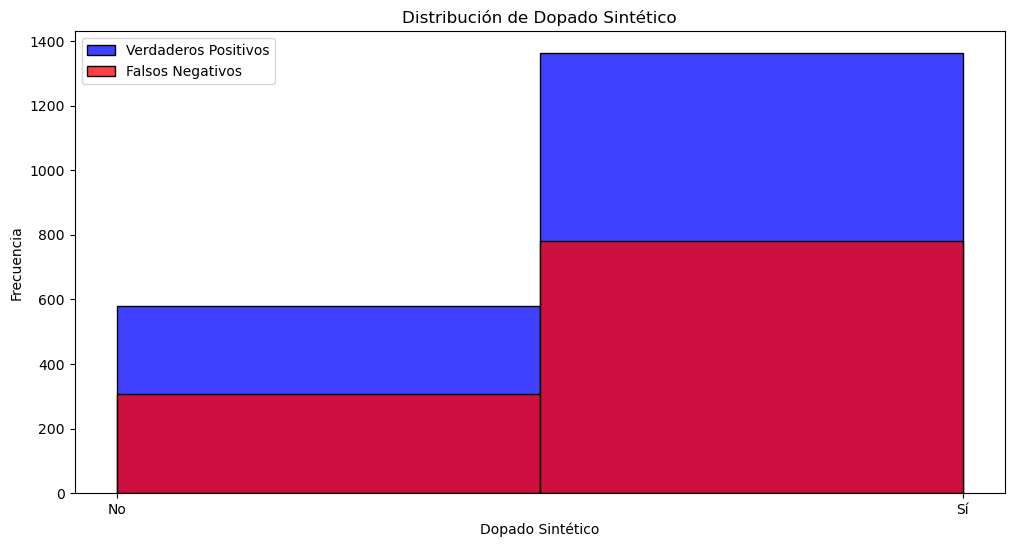

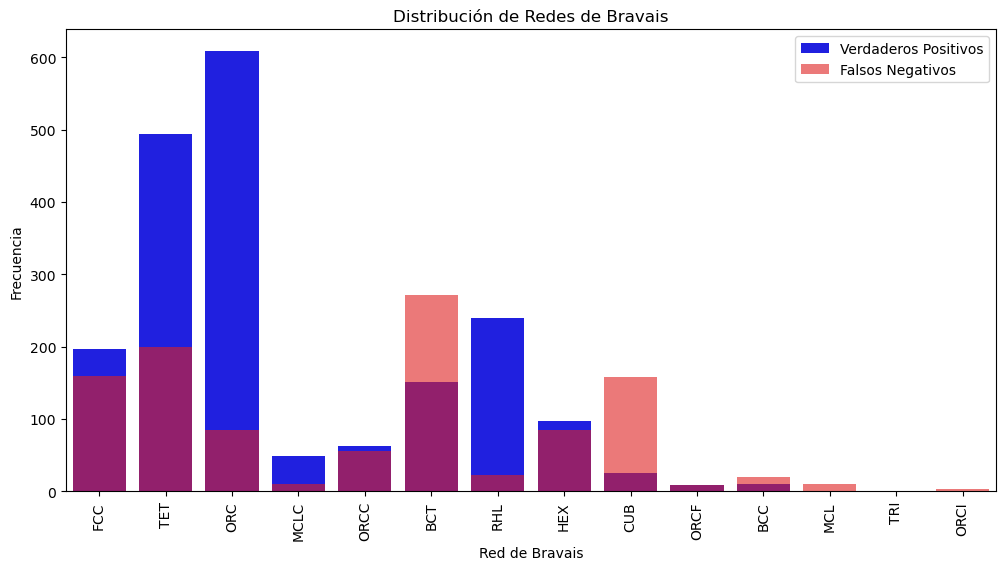

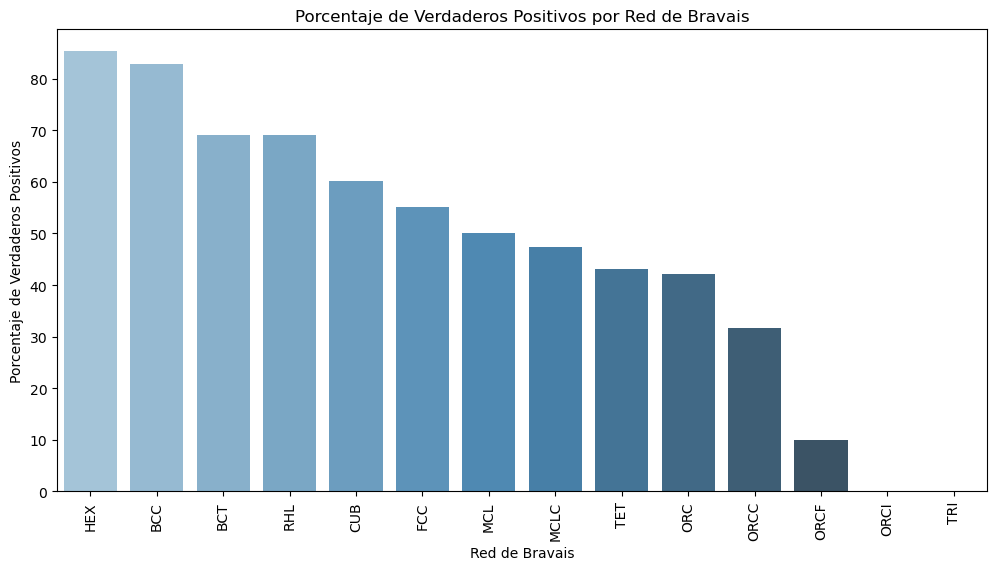

In [52]:
verdaderos_positivos = X_test_predictions[(X_test_predictions['is_superconductor'] == True) & (X_test_predictions['predicted_superconductor'] == True)]
falsos_negativos = X_test_predictions[(X_test_predictions['is_superconductor'] == True) & (X_test_predictions['predicted_superconductor'] == False)]

falsos_positivos = X_test_predictions[(X_test_predictions['is_superconductor'] == False) & (X_test_predictions['predicted_superconductor'] == True)].copy()
verdaderos_negativos = X_test_predictions[(X_test_predictions['is_superconductor'] == False) & (X_test_predictions['predicted_superconductor'] == False)].copy()

desc_verdaderos_positivos = verdaderos_positivos[['bravais_lattice', 'material_name', 'ICSD', 'fermi_energy', 'is_magnetic', 'is_superconductor', 
                                                 'predicted_superconductor', 'critical_temperature_k', 'synth_doped']].describe()
desc_falsos_negativos = falsos_negativos[['bravais_lattice', 'material_name', 'ICSD', 'fermi_energy', 'is_magnetic', 'is_superconductor', 
                                       'predicted_superconductor', 'critical_temperature_k', 'synth_doped']].describe()

# Mostrar descripción estadística
print("Descripción estadística de los verdaderos positivos:")
print(f"{len(verdaderos_positivos)}")
print(desc_verdaderos_positivos)
print("\nDescripción estadística de los falsos negativos:")
print(f"{len(falsos_negativos)}")
print(desc_falsos_negativos)

# Visualizar la distribución de la energía de Fermi
plt.figure(figsize=(12, 6))
sns.histplot(verdaderos_positivos['fermi_energy'], kde=True, color='blue', label='Verdaderos Positivos')
sns.histplot(falsos_negativos['fermi_energy'], kde=True, color='red', label='Falsos Positivos')
plt.legend()
plt.title('Distribución de la Energía de Fermi')
plt.xlabel('Energía de Fermi')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la relación entre critical_temperature_k y fermi_energy
plt.figure(figsize=(12, 6))
sns.scatterplot(data=verdaderos_positivos, x='fermi_energy', y='critical_temperature_k', color='blue', label='Verdaderos Positivos')
sns.scatterplot(data=falsos_negativos, x='fermi_energy', y='critical_temperature_k', color='red', label='Falsos Negativos')
plt.legend()
plt.title('Relación entre Energía de Fermi y Temperatura Crítica')
plt.xlabel('Energía de Fermi')
plt.ylabel('Temperatura Crítica (K)')
plt.show()

# Visualizar si están dopados sintéticamente
plt.figure(figsize=(12, 6))
sns.histplot(verdaderos_positivos['is_magnetic'].astype(int), kde=False, color='blue', label='Verdaderos Positivos', bins=2)
sns.histplot(falsos_negativos['is_magnetic'].astype(int), kde=False, color='red', label='Falsos Negativos', bins=2)
plt.legend()
plt.title('Distribución de magnetismo')
plt.xlabel('Magnetismo')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

# Visualizar si están dopados sintéticamente
plt.figure(figsize=(12, 6))
sns.histplot(verdaderos_positivos['synth_doped'].astype(int), kde=False, color='blue', label='Verdaderos Positivos', bins=2)
sns.histplot(falsos_negativos['synth_doped'].astype(int), kde=False, color='red', label='Falsos Negativos', bins=2)
plt.legend()
plt.title('Distribución de Dopado Sintético')
plt.xlabel('Dopado Sintético')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

# Visualizar las redes de Bravais
plt.figure(figsize=(12, 6))
sns.countplot(data=verdaderos_positivos, x='bravais_lattice', color='blue', label='Verdaderos Positivos')
sns.countplot(data=falsos_negativos, x='bravais_lattice', color='red', label='Falsos Negativos', alpha=0.6)
plt.legend()
plt.title('Distribución de Redes de Bravais')
plt.xlabel('Red de Bravais')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

# Calcular el porcentaje de verdaderos positivos para cada red de Bravais
total_por_bravais = X_test_predictions[X_test_predictions['is_superconductor'] == True]['bravais_lattice'].value_counts()
verdaderos_por_bravais = verdaderos_positivos['bravais_lattice'].value_counts()

porcentaje_verdaderos_positivos = (verdaderos_por_bravais / total_por_bravais) * 100

# Crear un DataFrame para facilitar la visualización
df_porcentaje = pd.DataFrame({
    'bravais_lattice': porcentaje_verdaderos_positivos.index,
    'porcentaje_verdaderos_positivos': porcentaje_verdaderos_positivos.values
}).sort_values(by='porcentaje_verdaderos_positivos', ascending=False)

# Visualizar el porcentaje de verdaderos positivos por red de Bravais
plt.figure(figsize=(12, 6))
sns.barplot(data=df_porcentaje, x='bravais_lattice', y='porcentaje_verdaderos_positivos', palette='Blues_d')
plt.title('Porcentaje de Verdaderos Positivos por Red de Bravais')
plt.xlabel('Red de Bravais')
plt.ylabel('Porcentaje de Verdaderos Positivos')
plt.xticks(rotation=90)
plt.show()

In [53]:
X_reducted = X_test_predictions[['bravais_lattice', 'material_name', 'ICSD', 'fermi_energy', 'is_magnetic', 'critical_temperature_k', 'synth_doped', 'is_superconductor', 'predicted_superconductor']].copy()

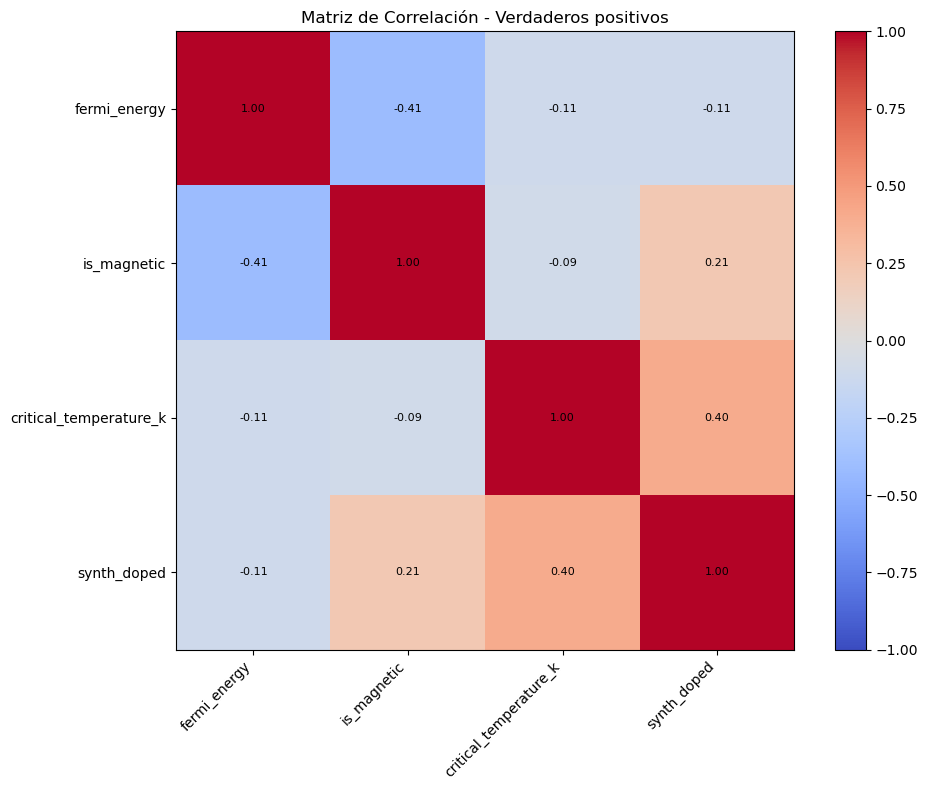

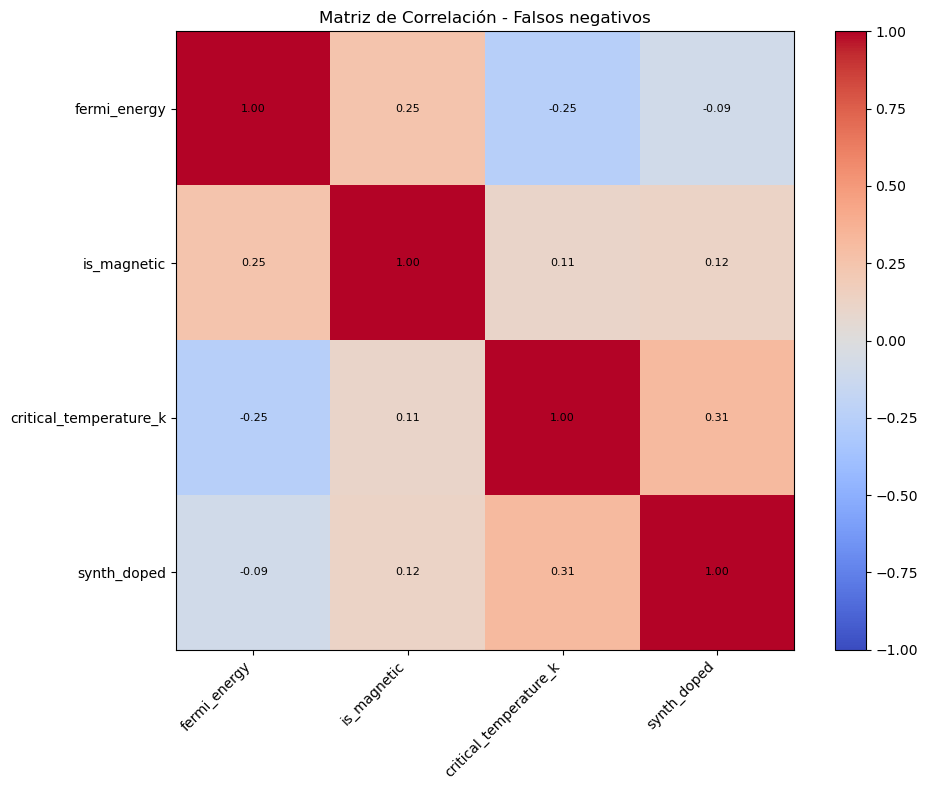

In [54]:
correlation_matrix = X_reducted[(X_test_predictions['is_superconductor'] == True) & (X_test_predictions['predicted_superconductor'] == True)][['fermi_energy', 'is_magnetic', 'critical_temperature_k', 'synth_doped']].corr()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)

cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(correlation_matrix.columns)
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black", size=8)

ax.set_title('Matriz de Correlación - Verdaderos positivos')
fig.tight_layout()
plt.show()


correlation_matrix = X_reducted[(X_test_predictions['is_superconductor'] == True) & (X_test_predictions['predicted_superconductor'] == False)][['fermi_energy', 'is_magnetic', 'critical_temperature_k', 'synth_doped']].corr()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)

cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(correlation_matrix.columns)
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black", size=8)

ax.set_title('Matriz de Correlación - Falsos negativos')
fig.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


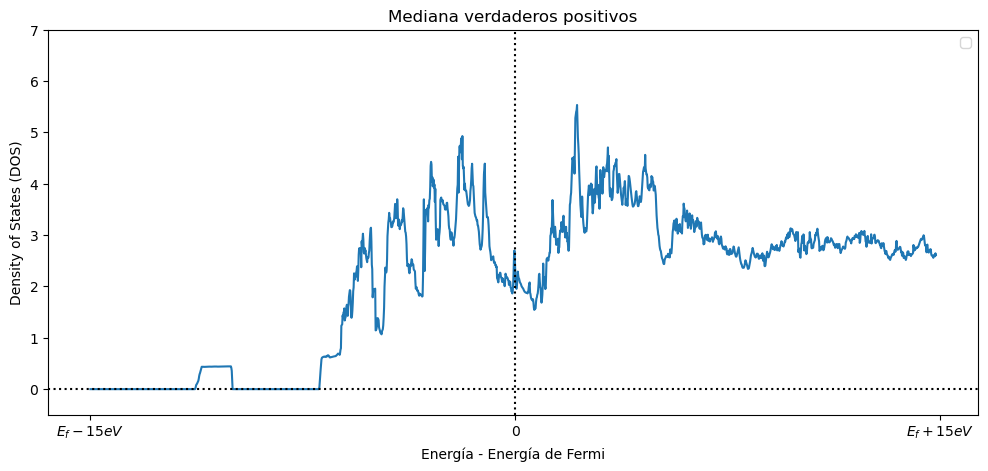

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


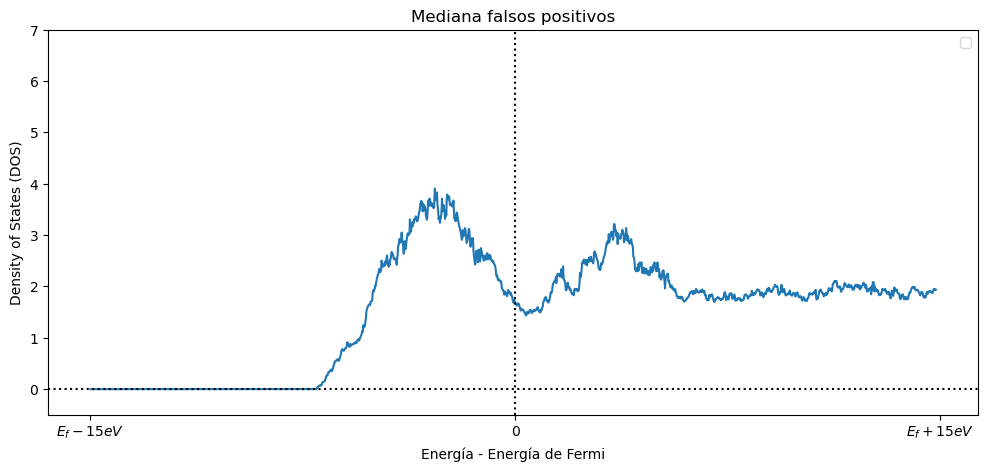

In [55]:
def plot_median_dos_by_bravais(data_materials, title):
    """
    Plots average DOS curves for each Bravais lattice group.
    """
    data_plot = data_materials.copy()

    plt.figure(figsize=(12,5))

    average_dos = data_plot.loc[:, 'DOS_m15_00':'DOS_p15_00'].median(axis=0)  
    plt.plot(average_dos)

    num_cols = len(data_materials.columns)
    center_index = num_cols // 2 

    plt.axhline(y=0, color='black', linestyle=':')
    plt.axvline(x=center_index, color='black', linestyle=':') 
    plt.xticks([0, center_index, num_cols - 1], labels=['$E_f-15eV$', '0', '$E_f+15eV$'])
    plt.ylabel("Density of States (DOS)")
    plt.xlabel("Energía - Energía de Fermi")
    plt.title(f"{title}")
    
    plt.grid(False)
    plt.legend()
    
    plt.ylim(-0.5,7)

    plt.show()

plot_median_dos_by_bravais(verdaderos_positivos, title='Mediana verdaderos positivos')
plot_median_dos_by_bravais(falsos_positivos, title='Mediana falsos positivos')

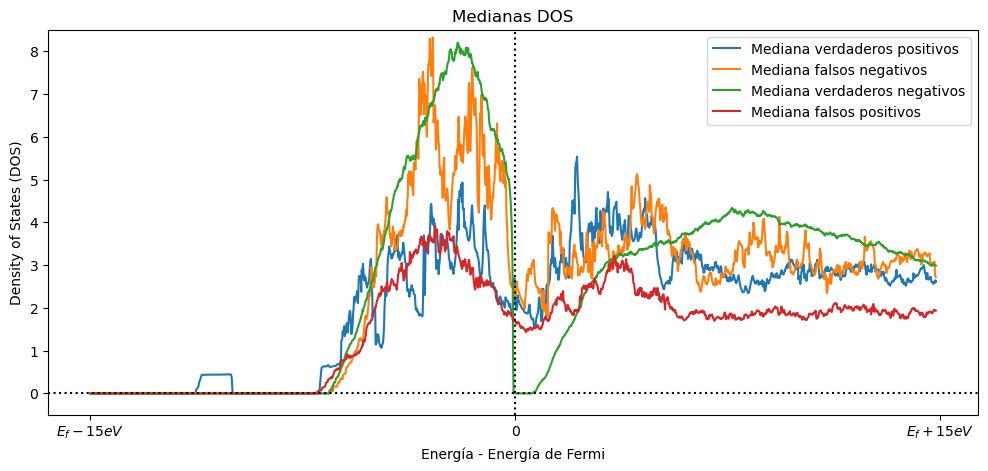

In [56]:
import matplotlib.pyplot as plt

def plot_median_dos_superposed(data_materials1, data_materials2, data_materials3, data_materials4, title1, title2, title3, title4, combined_title):
    """
    Plots average DOS curves for two sets of data superimposed.
    """
    data_plot1 = data_materials1.copy()
    data_plot2 = data_materials2.copy()
    data_plot3 = data_materials3.copy()
    data_plot4 = data_materials4.copy()

    plt.figure(figsize=(12,5))

    average_dos1 = data_plot1.loc[:, 'DOS_m15_00':'DOS_p15_00'].median(axis=0)  
    average_dos2 = data_plot2.loc[:, 'DOS_m15_00':'DOS_p15_00'].median(axis=0)  
    average_dos3 = data_plot3.loc[:, 'DOS_m15_00':'DOS_p15_00'].median(axis=0)  
    average_dos4 = data_plot4.loc[:, 'DOS_m15_00':'DOS_p15_00'].median(axis=0)
    
    plt.plot(average_dos1, label=title1)
    plt.plot(average_dos2, label=title2)
    plt.plot(average_dos3, label=title3)
    plt.plot(average_dos4, label=title4)

    num_cols = len(data_materials1.columns)
    center_index = num_cols // 2 

    plt.axhline(y=0, color='black', linestyle=':')
    plt.axvline(x=center_index, color='black', linestyle=':') 
    plt.xticks([0, center_index, num_cols - 1], labels=['$E_f-15eV$', '0', '$E_f+15eV$'])
    plt.ylabel("Density of States (DOS)")
    plt.xlabel("Energía - Energía de Fermi")
    plt.title(combined_title)
    
    plt.grid(False)
    plt.legend()
    
    plt.ylim(-0.5, 8.5)

    plt.show()

plot_median_dos_superposed(verdaderos_positivos, falsos_negativos, verdaderos_negativos, falsos_positivos, 
                           title1='Mediana verdaderos positivos', 
                           title2='Mediana falsos negativos', 
                           title3='Mediana verdaderos negativos', 
                           title4='Mediana falsos positivos',
                           combined_title='Medianas DOS')


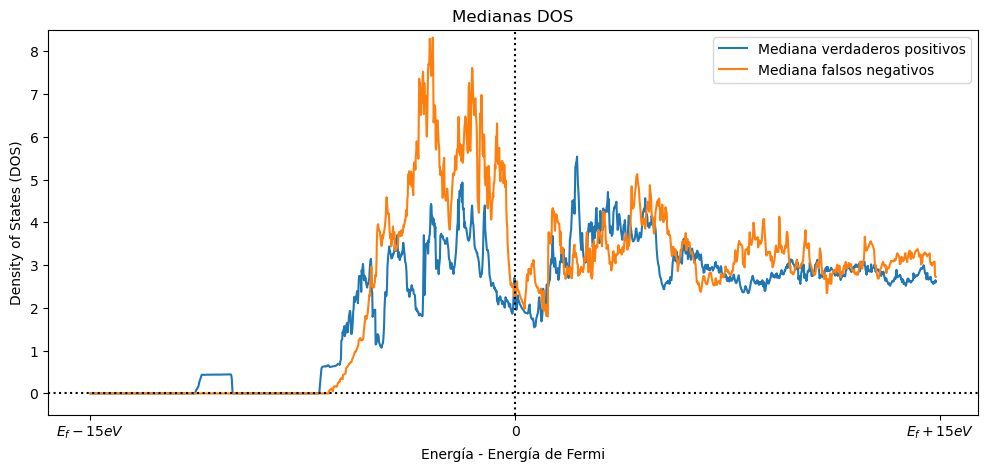

In [57]:
def plot_median_dos_superposed(data_materials1, data_materials2, data_materials3, data_materials4, title1, title2, title3, title4, combined_title):
    """
    Plots average DOS curves for two sets of data superimposed.
    """
    data_plot1 = data_materials1.copy()
    data_plot2 = data_materials2.copy()
    data_plot3 = data_materials3.copy()
    data_plot4 = data_materials4.copy()

    plt.figure(figsize=(12,5))

    average_dos1 = data_plot1.loc[:, 'DOS_m15_00':'DOS_p15_00'].median(axis=0)  
    average_dos2 = data_plot2.loc[:, 'DOS_m15_00':'DOS_p15_00'].median(axis=0)  
    average_dos3 = data_plot3.loc[:, 'DOS_m15_00':'DOS_p15_00'].median(axis=0)  
    average_dos4 = data_plot4.loc[:, 'DOS_m15_00':'DOS_p15_00'].median(axis=0)
    
    plt.plot(average_dos1, label=title1)
    plt.plot(average_dos2, label=title2)
    # plt.plot(average_dos3, label=title3)
    # plt.plot(average_dos4, label=title4)

    num_cols = len(data_materials1.columns)
    center_index = num_cols // 2 

    plt.axhline(y=0, color='black', linestyle=':')
    plt.axvline(x=center_index, color='black', linestyle=':') 
    plt.xticks([0, center_index, num_cols - 1], labels=['$E_f-15eV$', '0', '$E_f+15eV$'])
    plt.ylabel("Density of States (DOS)")
    plt.xlabel("Energía - Energía de Fermi")
    plt.title(combined_title)
    
    plt.grid(False)
    plt.legend()
    
    plt.ylim(-0.5, 8.5)

    plt.show()

plot_median_dos_superposed(verdaderos_positivos, falsos_negativos, verdaderos_negativos, falsos_positivos, 
                           title1='Mediana verdaderos positivos', 
                           title2='Mediana falsos negativos', 
                           title3='Mediana verdaderos negativos', 
                           title4='Mediana falsos positivos',
                           combined_title='Medianas DOS')


In [58]:
print(len(verdaderos_positivos), len(falsos_negativos), len(verdaderos_negativos), len(falsos_positivos))

1943 1090 10678 376


In [70]:
materials_data.columns.tolist()[839:1172]

['DOS_m2_49',
 'DOS_m2_48',
 'DOS_m2_46',
 'DOS_m2_45',
 'DOS_m2_43',
 'DOS_m2_42',
 'DOS_m2_40',
 'DOS_m2_39',
 'DOS_m2_37',
 'DOS_m2_36',
 'DOS_m2_34',
 'DOS_m2_33',
 'DOS_m2_31',
 'DOS_m2_30',
 'DOS_m2_28',
 'DOS_m2_27',
 'DOS_m2_25',
 'DOS_m2_24',
 'DOS_m2_22',
 'DOS_m2_21',
 'DOS_m2_19',
 'DOS_m2_18',
 'DOS_m2_16',
 'DOS_m2_15',
 'DOS_m2_13',
 'DOS_m2_12',
 'DOS_m2_10',
 'DOS_m2_09',
 'DOS_m2_07',
 'DOS_m2_06',
 'DOS_m2_04',
 'DOS_m2_03',
 'DOS_m2_01',
 'DOS_m2_00',
 'DOS_m1_98',
 'DOS_m1_97',
 'DOS_m1_95',
 'DOS_m1_94',
 'DOS_m1_92',
 'DOS_m1_91',
 'DOS_m1_89',
 'DOS_m1_88',
 'DOS_m1_86',
 'DOS_m1_85',
 'DOS_m1_83',
 'DOS_m1_82',
 'DOS_m1_80',
 'DOS_m1_79',
 'DOS_m1_77',
 'DOS_m1_76',
 'DOS_m1_74',
 'DOS_m1_73',
 'DOS_m1_71',
 'DOS_m1_70',
 'DOS_m1_68',
 'DOS_m1_67',
 'DOS_m1_65',
 'DOS_m1_64',
 'DOS_m1_62',
 'DOS_m1_61',
 'DOS_m1_59',
 'DOS_m1_58',
 'DOS_m1_56',
 'DOS_m1_55',
 'DOS_m1_53',
 'DOS_m1_52',
 'DOS_m1_50',
 'DOS_m1_49',
 'DOS_m1_47',
 'DOS_m1_46',
 'DOS_m1_44',
 'DOS_

In [72]:
data_prefilter = materials_data.copy()
data.dropna(inplace=True)
data['is_superconductor'] = data['is_superconductor'].astype(bool)

first_six_columns = data_prefilter.iloc[:, :6]
selected_dos_columns = data_prefilter.loc[:, 'DOS_m2_49':'DOS_p2_49']
data = pd.concat([first_six_columns, selected_dos_columns], axis=1)

# n_PCA = 10
# pca_columns = [f'PC{i+1}' for i in range(n_PCA)]
dos_cols = selected_dos_columns.columns.tolist()
categorical_cols = ['bravais_lattice']
target_col = ['is_superconductor']
numerical_cols = ['fermi_energy', 'is_magnetic'] + dos_cols

X = data.drop(target_col, axis=1)
X = X.fillna(0) 
y = data[target_col]
y = y.iloc[:, 0]

# pca = PCA(n_components=n_PCA)
# X_pca = pca.fit_transform(X[dos_cols])
# X_pca = pd.DataFrame(X_pca, columns=pca_columns)

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = RobustScaler()
X_categorical = categorical_transformer.fit_transform(X[categorical_cols]).toarray()
X_categorical = pd.DataFrame(X_categorical, columns=categorical_transformer.get_feature_names_out(categorical_cols))
X_numerical = numerical_transformer.fit_transform(X[numerical_cols])
X_numerical = pd.DataFrame(X_numerical, columns=numerical_cols)

X = pd.concat([X_categorical, X_numerical], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sampling_method = RandomOverSampler()
X_train_sampled, y_train_sampled = sampling_method.fit_resample(X_train, y_train)

X_train, X_eval, y_train, y_eval = train_test_split(X_train_sampled, y_train_sampled, test_size=0.2)

In [62]:
train_data = pd.concat([pd.DataFrame(X_train_sampled).reset_index(drop=True), pd.DataFrame(y_train_sampled).reset_index(drop=True)], axis=1)
test_data = pd.concat([pd.DataFrame(X_test).reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

predictor = TabularPredictor(label='is_superconductor', 
                             problem_type='binary', 
                             eval_metric='f1', 
                             path=os.path.join(path_final, 'autogluon_raw', 'Autogluon')
                             ).fit(
                                 TabularDataset(train_data),
                                 presets='medium_quality'
                                 )
performance = predictor.evaluate(TabularDataset(test_data))
leaderboard = predictor.leaderboard(TabularDataset(test_data), extra_metrics=['accuracy', 'roc_auc', 'precision', 'recall'], silent=True)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19041
CPU Count:          6
Memory Avail:       6.15 GB / 15.93 GB (38.6%)
Disk Space Avail:   294.07 GB / 931.38 GB (31.6%)
Presets specified: ['medium_quality']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to ".\..\results\patrones\autogluon_raw\Autogluon"
Train Data Rows:    88446
Train Data Columns: 149
Label Column:       is_superconductor
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = True, class 0 = False
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Av

[1000]	valid_set's binary_logloss: 0.211011	valid_set's f1: 0.93667
[2000]	valid_set's binary_logloss: 0.138339	valid_set's f1: 0.960216
[3000]	valid_set's binary_logloss: 0.105519	valid_set's f1: 0.96892
[4000]	valid_set's binary_logloss: 0.0873726	valid_set's f1: 0.973838
[5000]	valid_set's binary_logloss: 0.0765239	valid_set's f1: 0.977273
[6000]	valid_set's binary_logloss: 0.0692167	valid_set's f1: 0.980346
[7000]	valid_set's binary_logloss: 0.0646249	valid_set's f1: 0.981932
[8000]	valid_set's binary_logloss: 0.0607643	valid_set's f1: 0.982318
[9000]	valid_set's binary_logloss: 0.0580928	valid_set's f1: 0.983091
[10000]	valid_set's binary_logloss: 0.0558448	valid_set's f1: 0.985028


	0.985	 = Validation score   (f1)
	94.54s	 = Training   runtime
	0.55s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's binary_logloss: 0.138991	valid_set's f1: 0.966718
[2000]	valid_set's binary_logloss: 0.0795433	valid_set's f1: 0.980392
[3000]	valid_set's binary_logloss: 0.0593535	valid_set's f1: 0.983865
[4000]	valid_set's binary_logloss: 0.0500437	valid_set's f1: 0.987362
[5000]	valid_set's binary_logloss: 0.0474859	valid_set's f1: 0.987752
[6000]	valid_set's binary_logloss: 0.0485517	valid_set's f1: 0.988533
[7000]	valid_set's binary_logloss: 0.0505792	valid_set's f1: 0.989315
[8000]	valid_set's binary_logloss: 0.0528025	valid_set's f1: 0.989315
[9000]	valid_set's binary_logloss: 0.0557341	valid_set's f1: 0.989707


	0.9897	 = Validation score   (f1)
	96.95s	 = Training   runtime
	0.35s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9901	 = Validation score   (f1)
	71.38s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9897	 = Validation score   (f1)
	77.6s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: CatBoost ...
	0.9831	 = Validation score   (f1)
	413.98s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9881	 = Validation score   (f1)
	16.0s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9881	 = Validation score   (f1)
	15.93s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.8981	 = Validation score   (f1)
	86.88s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: XGBoost ...
	0.9835	 = Validation score   (f1)
	34.18s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: Neur

[1000]	valid_set's binary_logloss: 0.0645364	valid_set's f1: 0.98464
[2000]	valid_set's binary_logloss: 0.0457326	valid_set's f1: 0.988924


	0.9893	 = Validation score   (f1)
	61.72s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'RandomForestGini': 0.8, 'LightGBMLarge': 0.2}
	0.9905	 = Validation score   (f1)
	0.63s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 1426.82s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 18093.9 rows/s (2500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load(".\..\results\patrones\autogluon_raw\Autogluon")


In [64]:
leaderboard

,model,score_test,accuracy,roc_auc,precision,recall,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesEntr,0.638064,0.945367,0.923523,0.683962,0.597938,0.988142,f1,0.382008,0.066888,15.929345,0.382008,0.066888,15.929345,1,True,9
1,ExtraTreesGini,0.633904,0.944952,0.923334,0.682521,0.591753,0.988142,f1,0.383805,0.072115,15.999990,0.383805,0.072115,15.999990,1,True,8
2,LightGBMXT,0.626335,0.938974,0.928553,0.617854,0.635052,0.985028,f1,2.851755,0.549374,94.535955,2.851755,0.549374,94.535955,1,True,3
3,RandomForestEntr,0.623946,0.944454,0.920746,0.686032,0.572165,0.989707,f1,0.232447,0.078153,77.596356,0.232447,0.078153,77.596356,1,True,6
4,WeightedEnsemble_L2,0.621348,0.944039,0.924081,0.682716,0.570103,0.990491,f1,0.728072,0.138168,133.725580,0.000000,0.000000,0.628048,2,True,14
5,LightGBMLarge,0.621220,0.942793,0.921835,0.665489,0.582474,0.989315,f1,0.464497,0.083226,61.717431,0.464497,0.083226,61.717431,1,True,13
6,LightGBM,0.619048,0.942876,0.918554,0.668660,0.576289,0.989707,f1,1.288293,0.350244,96.952264,1.288293,0.350244,96.952264,1,True,4
7,RandomForestGini,0.617978,0.943540,0.921373,0.679012,0.567010,0.990099,f1,0.263576,0.054942,71.380101,0.263576,0.054942,71.380101,1,True,5
8,CatBoost,0.614044,0.937479,0.917403,0.610601,0.617526,0.983091,f1,0.084031,0.015625,413.976956,0.084031,0.015625,413.976956,1,True,7
9,XGBoost,0.613972,0.937147,0.919820,0.607467,0.620619,0.983478,f1,0.299163,0.033177,34.184474,0.299163,0.033177,34.184474,1,True,11


In [74]:
################ MODELO 

params = {
    'colsample_bytree': 0.5,
    'gamma': 0.01,
    'learning_rate': 0.22346832437911052,
    'max_depth': 24,
    'n_estimators': 1500,
    'reg_alpha': 0.01,
    'reg_lambda': 0.01,
    'subsample': 0.8240736137234501
}

model = XGBClassifier(**params)
model.fit(X_train, y_train, eval_set=[(X_eval, y_eval), (X_test, y_test)], eval_metric=['error'], early_stopping_rounds=50, verbose=False)

# model = LGBMClassifier()
# model.fit(X_train_sampled, y_train_sampled)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print(f"\nMétricas de rendimiento:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Matriz de confusión:\n{confusion_matrix_result}\n")

c:\Users\Usuario\anaconda3\envs\superconductor\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\Usuario\anaconda3\envs\superconductor\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Métricas de rendimiento:
Accuracy: 0.9457
Precision: 0.6768
Recall: 0.6223
F1-score: 0.6484
AUC: 0.9294
Matriz de confusión:
[[10787   288]
 [  366   603]]

